In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau, spearmanr

In [ ]:
df_test = pd.read_csv("data/raw/poetry_data_test.zip")
df = df_test[:3000]

data = open("temp.txt").readlines()
scores = [int(x.replace("\n", "")) if x != "None\n" else x for x in data]
df["pred"] = scores
df = df[df["pred"] != "None\n"]

In [ ]:
def print_metrics(y, y_pred, prefix=""):
    kendall_tau, _ = kendalltau(y, y_pred)
    print(f"{prefix.upper()}: Kendall's Tau: {kendall_tau}")
    kendall_tau, _ = spearmanr(y, y_pred)
    print(f"{prefix.upper()}: Spearmanr: {kendall_tau}")


def rating_views_target(rating, views):
    if views == 0:
        return 0
    return views + np.exp(1 + rating / (rating + views)) * rating

In [ ]:
rating_views_target(0, 150)

150.0

In [ ]:
rating_views_target(75, 75)

411.12668027535483

In [ ]:
print_metrics(df["rating"].to_list(), df["pred"].to_list())

: Kendall's Tau: 0.12774926189756403
: Spearmanr: 0.16656870681757996


In [ ]:
print_metrics(df["views"].to_list(), df["pred"].to_list())

: Kendall's Tau: 0.0014017369928848982
: Spearmanr: 0.0017539041520880621


In [ ]:
print_metrics(
    df.apply(
        lambda row: rating_views_target(row["rating"], row["views"]), axis=1
    ).to_list(),
    df["pred"].to_list(),
)

: Kendall's Tau: 0.03984507409614678
: Spearmanr: 0.05787304289029436


In [ ]:
pushkin = """«Мой дядя самых честных правил,
Когда не в шутку занемог,
Он уважать себя заставил
И лучше выдумать не мог.
Его пример другим наука;
Но, боже мой, какая скука
С больным сидеть и день и ночь,
Не отходя ни шагу прочь!
Какое низкое коварство
Полуживого забавлять,
Ему подушки поправлять,
Печально подносить лекарство,
Вздыхать и думать про себя:
Когда же черт возьмет тебя!»"""

esenin = """Заметался пожар голубой,
Позабылись родимые дали.
В первый раз я запел про любовь,
В первый раз отрекаюсь скандалить.
Был я весь — как запущенный сад,
Был на женщин и зелие падкий.
Разонравилось пить и плясать
И терять свою жизнь без оглядки.
Мне бы только смотреть на тебя,
Видеть глаз злато-карий омут,
И чтоб, прошлое не любя,
Ты уйти не смогла к другому."""

gpt_random = """Скачет воробей на лужу,
Сыр с орехом в тёмном стуже.
Три колеса по лужайке плывут,
А в горле йогурт, а рядом салют.

Липнет клюква к потолку,
Жук танцует в молоку,
В небе радуга-тетрадь,
Как же тут не полетать?"""

top_poem_in_test = df_test[df_test["rating"] == df_test["rating"].max()][
    "output_text"
].values[0]

bottom_poem_in_test = df_test[df_test["views"] == df_test["views"].min()][
    "output_text"
].values[1]

random_words = """Озеро
Путешествие
Сияние
Листопад
Велосипед
Мечта
Зонтик
Река
Горизонт
Вдохновение
Фонарь
Ласточка
Ступенька"""

sanity_check = [
    pushkin,
    esenin,
    gpt_random,
    top_poem_in_test,
    bottom_poem_in_test,
    random_words,
]

'Твоя звезда уже сияет\nНад мириадами огней.\nПоэзия ещё не знает\nВсей гениальности твоей.'

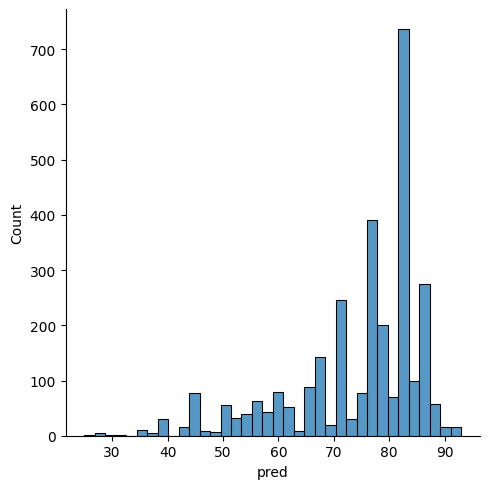

In [ ]:
sns.displot(df["pred"])